In [1]:
import pandas as pd 
import numpy as np 
from scipy.stats import chi2, shapiro

# Re-load the LDT Session 1 and LDT Session 2 data from the newly uploaded files
new_ldt_session_1_path = 'EZ_associative_learning_transformed_part_1.csv'
new_ldt_session_2_path = 'EZ_associative_learning_transformed_part_2.csv'

# Load the new data
new_ldt_session_1_data = pd.read_csv(new_ldt_session_1_path)
new_ldt_session_2_data = pd.read_csv(new_ldt_session_2_path)

# Check the first few rows to confirm data is loaded correctly
(new_ldt_session_1_data.head(), new_ldt_session_2_data.head())


(                            Experiment   v1_mean   v2_mean   v3_mean  \
 0  1000_associative_priming_part_1.dat  1.635332  1.627167 -1.970332   
 1  1001_associative_priming_part_1.dat  2.341084  2.271870 -2.525586   
 2  1002_associative_priming_part_1.dat  1.871328  2.085420 -2.046255   
 3  1003_associative_priming_part_1.dat  2.259589  2.041653 -2.859057   
 4  1004_associative_priming_part_1.dat  1.816032  1.321297 -1.772583   
 
     v4_mean    a_mean  ndt1_mean  ndt2_mean  ndt3_mean  ndt4_mean  ...  \
 0 -1.790786  1.295439   0.460809   0.512835   0.581686   0.524307  ...   
 1 -2.231322  1.667652   0.487246   0.509897   0.566825   0.547781  ...   
 2 -1.878856  1.493206   0.428982   0.520734   0.544821   0.537896  ...   
 3 -2.332323  1.663142   0.455531   0.518839   0.544248   0.517613  ...   
 4 -2.070680  1.128478   0.427746   0.451682   0.490703   0.500813  ...   
 
                                                 q4_E    ID  Task    Session  \
 0  [1.111 1.097 1.088 1.239

In [2]:
new_ldt_session_1_data.insert(5, "v_total = (v2 + v1)-(v3+v4)", (new_ldt_session_1_data['v1_mean']+new_ldt_session_1_data['v2_mean'])-(new_ldt_session_1_data['v3_mean']+new_ldt_session_1_data['v4_mean']), True)
new_ldt_session_1_data.insert(6, "v_bias = (v2 + v1)+ (v3+v4)", (new_ldt_session_1_data['v1_mean']+new_ldt_session_1_data['v2_mean'])+(new_ldt_session_1_data['v3_mean']+new_ldt_session_1_data['v4_mean']), True)
new_ldt_session_1_data.insert(7, "v_w_priming = (v2 - v1)", (new_ldt_session_1_data['v1_mean']-new_ldt_session_1_data['v2_mean']), True)
new_ldt_session_1_data.insert(8, "v_nw_priming = (v4 - v3)", (new_ldt_session_1_data['v4_mean']-new_ldt_session_1_data['v3_mean']), True)




In [3]:
new_ldt_session_2_data.insert(5, "v_total = (v2 + v1)-(v3+v4)", (new_ldt_session_2_data['v1_mean']+new_ldt_session_2_data['v2_mean'])-(new_ldt_session_2_data['v3_mean']+new_ldt_session_2_data['v4_mean']), True)
new_ldt_session_2_data.insert(6, "v_bias = (v2 + v1)+ (v3+v4)", (new_ldt_session_2_data['v1_mean']+new_ldt_session_2_data['v2_mean'])+(new_ldt_session_2_data['v3_mean']+new_ldt_session_2_data['v4_mean']), True)
new_ldt_session_2_data.insert(7, "v_w_priming = (v2 - v1)", (new_ldt_session_2_data['v1_mean']-new_ldt_session_2_data['v2_mean']), True)
new_ldt_session_2_data.insert(8, "v_nw_priming = (v4 - v3)", (new_ldt_session_2_data['v4_mean']-new_ldt_session_2_data['v3_mean']), True)


In [4]:
def safe_mahalanobis(x=None, data=None, cov=None):
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()



In [6]:
# Re-identifying outliers for v1_mean using the updated data
# Extract the data for v1_mean
new_ldt_1_v1_mean = new_ldt_session_1_data.set_index('ID')['v1_mean']
new_ldt_2_v1_mean = new_ldt_session_2_data.set_index('ID')['v1_mean']

# Ensure only matching IDs are kept for comparison
new_common_ids = new_ldt_1_v1_mean.index.intersection(new_ldt_2_v1_mean.index)
new_paired_v1_means = pd.concat([new_ldt_1_v1_mean.loc[new_common_ids], new_ldt_2_v1_mean.loc[new_common_ids]], axis=1, keys=['Session1', 'Session2'])

# Calculate Mahalanobis distance using the safe function
new_mahalanobis_dist = safe_mahalanobis(x=new_paired_v1_means, data=new_paired_v1_means)

# Determine the threshold for p < 0.001
p_value = 0.001
new_threshold = chi2.ppf((1 - p_value), df=2)  # 2 variables, as we're looking at pairs

# Identify outliers
new_outliers = new_mahalanobis_dist > new_threshold

# Summarize the outliers
new_outlier_indices = new_paired_v1_means.index[new_outliers]
new_number_of_outliers = np.sum(new_outliers)

# Display the number of outliers and the threshold used
(new_number_of_outliers, new_outlier_indices, new_threshold)


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(0, Int64Index([], dtype='int64', name='ID'), 13.815510557964274)

In [7]:
def identify_outliers(columns, session_1_data, session_2_data, alpha=0.001):
    outlier_indices_dict = {}
    
    for col in columns:
        # Extract the data for the column
        session_1_col_data = session_1_data.set_index('ID')[col]
        session_2_col_data = session_2_data.set_index('ID')[col]

        # Ensure only matching IDs are kept for comparison
        common_ids = session_1_col_data.index.intersection(session_2_col_data.index)
        paired_col_data = pd.concat([session_1_col_data.loc[common_ids], session_2_col_data.loc[common_ids]], axis=1, keys=['Session1', 'Session2'])

        # Calculate Mahalanobis distance using the safe function
        mahalanobis_dist = safe_mahalanobis(x=paired_col_data, data=paired_col_data)

        # Determine the threshold for p < alpha
        threshold = chi2.ppf((1 - alpha), df=2)  # 2 variables, as we're looking at pairs

        # Identify outliers
        outliers = mahalanobis_dist > threshold
        outlier_indices = paired_col_data.index[outliers]
        
        # Save the indices of the outliers for each column
        outlier_indices_dict[col] = outlier_indices

    return outlier_indices_dict


columns_for_analysis = [
    'v1_mean',
 'v2_mean',
 'v3_mean',
 'v4_mean',
 'v_total = (v2 + v1)-(v3+v4)',
 'v_bias = (v2 + v1)+ (v3+v4)',
 'v_w_priming = (v2 - v1)',
 'v_nw_priming = (v4 - v3)',
 'a_mean',
 'ndt1_mean',
 'ndt2_mean',
 'ndt3_mean',
 'ndt4_mean',
 'alpha_mean',
    'accuracy_percentage',
    'mean_log_rt',
    'alpha_mean_boxcox_after_arcsin',
    'accuracy_percentage_boxcox_after_arcsin'
]

In [8]:
# Re-identify outliers for all specified columns using the updated data
new_outliers_dict = identify_outliers(columns_for_analysis, new_ldt_session_1_data, new_ldt_session_2_data)

# Display the number of outliers for each column
new_outlier_counts = {col: len(indices) for col, indices in new_outliers_dict.items()}
new_outlier_counts


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

{'v1_mean': 0,
 'v2_mean': 0,
 'v3_mean': 0,
 'v4_mean': 0,
 'v_total = (v2 + v1)-(v3+v4)': 0,
 'v_bias = (v2 + v1)+ (v3+v4)': 1,
 'v_w_priming = (v2 - v1)': 0,
 'v_nw_priming = (v4 - v3)': 0,
 'a_mean': 0,
 'ndt1_mean': 4,
 'ndt2_mean': 4,
 'ndt3_mean': 2,
 'ndt4_mean': 3,
 'alpha_mean': 0,
 'accuracy_percentage': 3,
 'mean_log_rt': 0,
 'alpha_mean_boxcox_after_arcsin': 0,
 'accuracy_percentage_boxcox_after_arcsin': 0}

In [9]:
import pandas as pd
import numpy as np
from scipy.stats import chi2

# Function to calculate Mahalanobis distance
def safe_mahalanobis(x=None, data=None, cov=None):
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

# Function to identify outliers for all specified columns
def identify_outliers(columns, session_1_data, session_2_data, alpha=0.001):
    outlier_indices_dict = {}
    
    for col in columns:
        # Extract the data for the column
        session_1_col_data = session_1_data.set_index('ID')[col]
        session_2_col_data = session_2_data.set_index('ID')[col]

        # Ensure only matching IDs are kept for comparison
        common_ids = session_1_col_data.index.intersection(session_2_col_data.index)
        paired_col_data = pd.concat([session_1_col_data.loc[common_ids], session_2_col_data.loc[common_ids]], axis=1)

        # Calculate Mahalanobis distance using the safe function
        mahalanobis_dist = safe_mahalanobis(x=paired_col_data, data=paired_col_data)

        # Determine the threshold for p < alpha
        threshold = chi2.ppf((1 - alpha), df=2)  # 2 variables, as we're looking at pairs

        # Identify outliers
        outliers = mahalanobis_dist > threshold
        outlier_indices = paired_col_data.index[outliers]
        
        # Save the indices of the outliers for each column
        outlier_indices_dict[col] = outlier_indices

    return outlier_indices_dict

# Load the data
# ldt_session_1_data = pd.read_csv('EZ_associative_learning_transformed_part_1.csv')
# ldt_session_2_data = pd.read_csv('EZ_associative_learning_transformed_part_2.csv')

ldt_session_1_data = new_ldt_session_1_data
ldt_session_2_data = new_ldt_session_2_data


# Columns specified for the reliability analysis
columns_for_analysis = [
   'v1_mean',
 'v2_mean',
 'v3_mean',
 'v4_mean',
    'v_total = (v2 + v1)-(v3+v4)',
 'v_bias = (v2 + v1)+ (v3+v4)',
 'v_w_priming = (v2 - v1)',
 'v_nw_priming = (v4 - v3)',
 'a_mean',
 'ndt1_mean',
 'ndt2_mean',
 'ndt3_mean',
 'ndt4_mean',
 'alpha_mean',
    'accuracy_percentage',
    'mean_log_rt',
    'alpha_mean_boxcox_after_arcsin',
    'accuracy_percentage_boxcox_after_arcsin'
]

# Identify outliers for each specified column between LDT Session 1 and LDT Session 2
outliers_dict = identify_outliers(columns_for_analysis, ldt_session_1_data, ldt_session_2_data)

# Display the number of outliers for each column
outlier_counts = {col: len(indices) for col, indices in outliers_dict.items()}
print(outlier_counts)


{'v1_mean': 0, 'v2_mean': 0, 'v3_mean': 0, 'v4_mean': 0, 'v_total = (v2 + v1)-(v3+v4)': 0, 'v_bias = (v2 + v1)+ (v3+v4)': 1, 'v_w_priming = (v2 - v1)': 0, 'v_nw_priming = (v4 - v3)': 0, 'a_mean': 0, 'ndt1_mean': 4, 'ndt2_mean': 4, 'ndt3_mean': 2, 'ndt4_mean': 3, 'alpha_mean': 0, 'accuracy_percentage': 3, 'mean_log_rt': 0, 'alpha_mean_boxcox_after_arcsin': 0, 'accuracy_percentage_boxcox_after_arcsin': 0}


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, pearsonr, shapiro

# Function to calculate Mahalanobis distance
# ... (same as previously defined)

# Function to identify outliers for all specified columns
# ... (same as previously defined)

# Function to remove outliers and calculate Pearson correlation
def analyze_and_plot(columns, session_1_data, session_2_data, alpha_outlier=0.001, alpha_normality=0.05):
    results = {}
    for col in columns:
        # Identify outliers
        outlier_indices = identify_outliers([col], session_1_data, session_2_data, alpha_outlier)[col]
        # Remove outliers
        clean_data = pd.concat([
            session_1_data.set_index('ID')[col],
            session_2_data.set_index('ID')[col]
        ], axis=1).drop(outlier_indices)
        
        # Calculate Pearson correlation
        correlation, p_value_corr = pearsonr(clean_data.iloc[:, 0], clean_data.iloc[:, 1])
        
        # Test for normality
        _, p_value_shapiro_1 = shapiro(clean_data.iloc[:, 0])
        _, p_value_shapiro_2 = shapiro(clean_data.iloc[:, 1])
        
        # Round the results to three decimals
        correlation = round(correlation, 3)
        p_value_corr = round(p_value_corr, 3)
        p_value_shapiro_1 = round(p_value_shapiro_1, 3)
        p_value_shapiro_2 = round(p_value_shapiro_2, 3)
        
        # Plotting
        plt.figure(figsize=(8, 6))
        plt.scatter(clean_data.iloc[:, 0], clean_data.iloc[:, 1], edgecolor='k')
        plt.title(f'Pearson Correlation for {col}\nCorrelation: {correlation} | p-value: {p_value_corr}')
        plt.xlabel('Session 1')
        plt.ylabel('Session 2')
        plt.grid(True)
        
        # Annotate with Shapiro-Wilk test results
        plt.annotate(f'Shapiro-Wilk Session 1: p={p_value_shapiro_1}', xy=(0.05, 0.92), xycoords='axes fraction')
        plt.annotate(f'Shapiro-Wilk Session 2: p={p_value_shapiro_2}', xy=(0.05, 0.88), xycoords='axes fraction')
        
        # Save the figure
        plt.savefig(f'correlation_plot_{col}.png', dpi=300, bbox_inches='tight')
        
        plt.close()
        
        # Store results
        results[col] = {
            'correlation': correlation,
            'p_value_corr': p_value_corr,
            'p_value_shapiro_1': p_value_shapiro_1,
            'p_value_shapiro_2': p_value_shapiro_2
        }
        
    return results

# Load the data
# ldt_session_1_data = pd.read_csv('EZ_associative_learning_transformed_part_1.csv')
# ldt_session_2_data = pd.read_csv('EZ_associative_learning_transformed_part_2.csv')

ldt_session_1_data = new_ldt_session_1_data
ldt_session_2_data = new_ldt_session_2_data

# Columns specified for the reliability analysis
# ... (same as previously defined)

# Run the analysis and plot for each column
results = analyze_and_plot(columns_for_analysis, ldt_session_1_data, ldt_session_2_data)
print(results)


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

{'v1_mean': {'correlation': 0.698, 'p_value_corr': 0.0, 'p_value_shapiro_1': 0.319, 'p_value_shapiro_2': 0.55}, 'v2_mean': {'correlation': 0.725, 'p_value_corr': 0.0, 'p_value_shapiro_1': 0.36, 'p_value_shapiro_2': 0.405}, 'v3_mean': {'correlation': 0.71, 'p_value_corr': 0.0, 'p_value_shapiro_1': 0.06, 'p_value_shapiro_2': 0.53}, 'v4_mean': {'correlation': 0.672, 'p_value_corr': 0.0, 'p_value_shapiro_1': 0.382, 'p_value_shapiro_2': 0.132}, 'v_total = (v2 + v1)-(v3+v4)': {'correlation': 0.782, 'p_value_corr': 0.0, 'p_value_shapiro_1': 0.133, 'p_value_shapiro_2': 0.187}, 'v_bias = (v2 + v1)+ (v3+v4)': {'correlation': 0.428, 'p_value_corr': 0.0, 'p_value_shapiro_1': 0.558, 'p_value_shapiro_2': 0.519}, 'v_w_priming = (v2 - v1)': {'correlation': 0.196, 'p_value_corr': 0.026, 'p_value_shapiro_1': 0.16, 'p_value_shapiro_2': 0.092}, 'v_nw_priming = (v4 - v3)': {'correlation': 0.089, 'p_value_corr': 0.316, 'p_value_shapiro_1': 0.91, 'p_value_shapiro_2': 0.199}, 'a_mean': {'correlation': 0.806, 

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

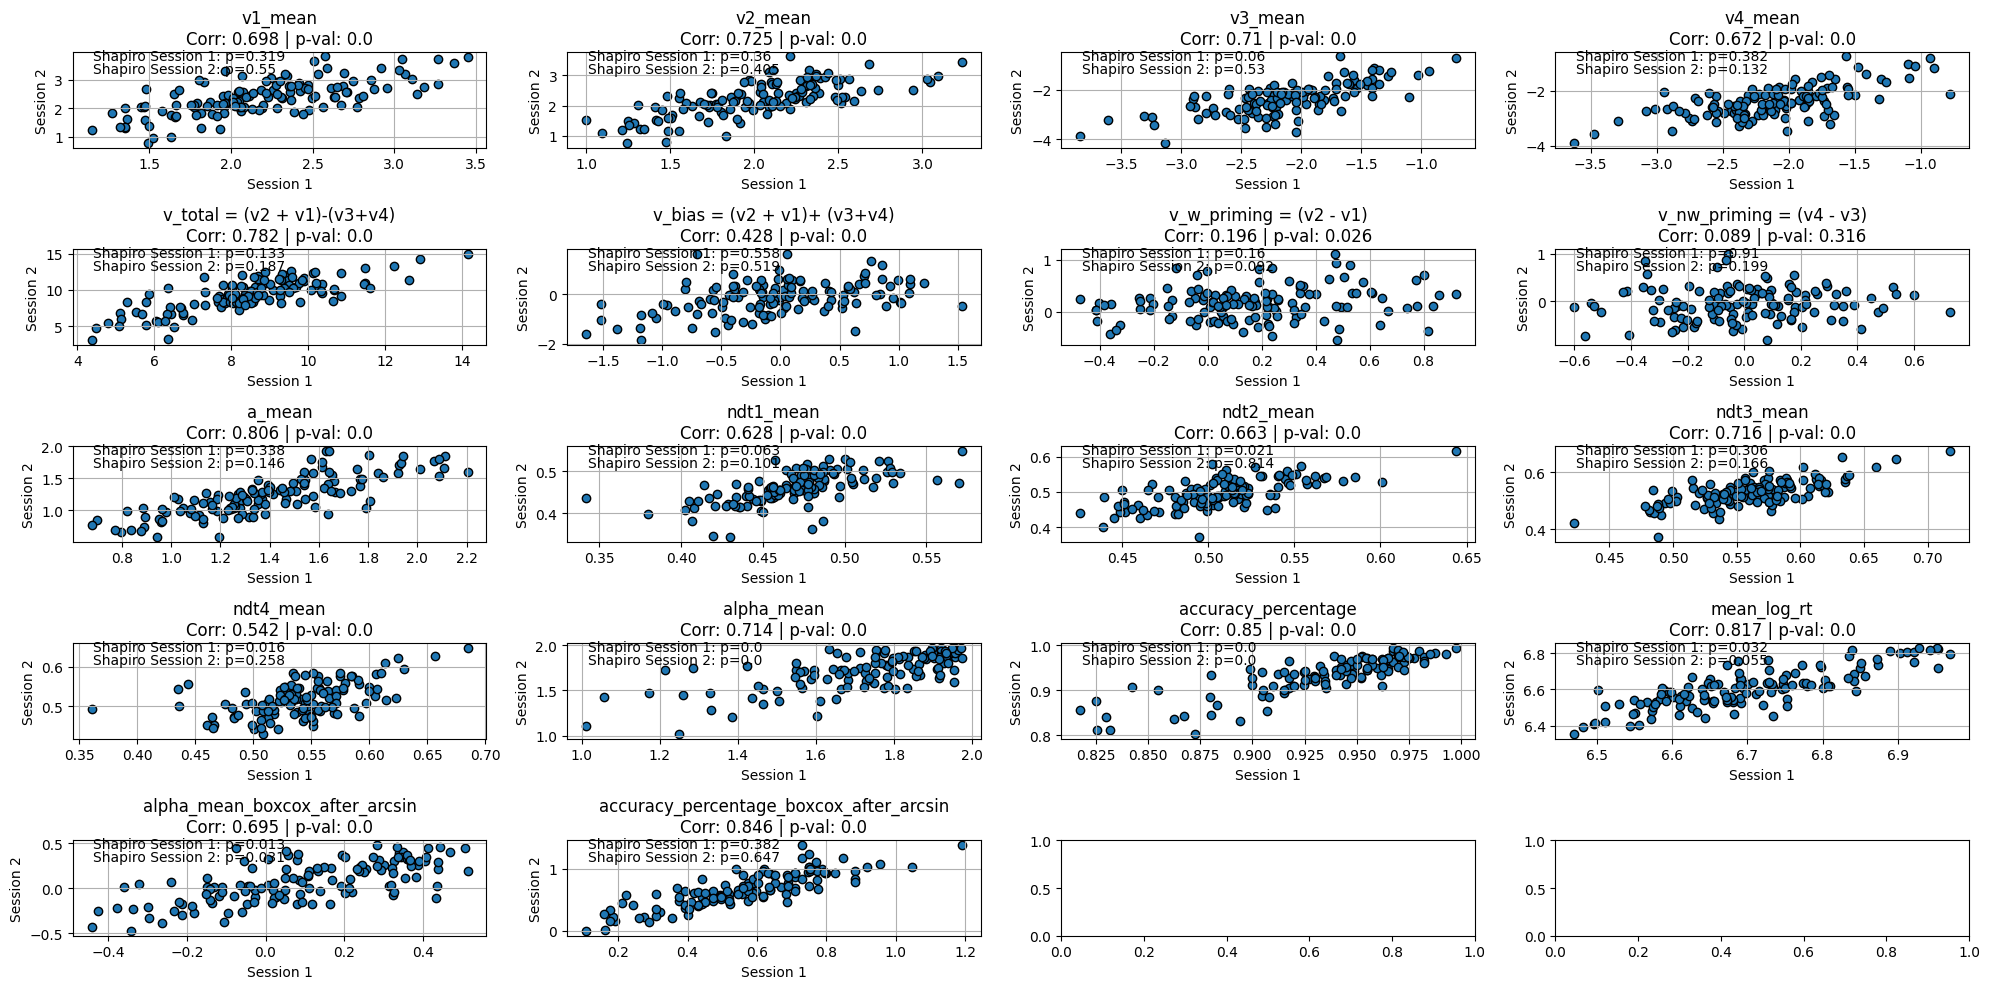

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, pearsonr, shapiro



# Prepare the figure for subplots
num_vars = len(columns_for_analysis)
num_rows = int(np.ceil(np.sqrt(num_vars)))
num_cols = int(np.ceil(num_vars / num_rows))
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))  # Adjust the size as needed
axes = axes.flatten()
correlation_matrix_reliability = pd.DataFrame()
# Perform analysis for each variable and plot
for i, col in enumerate(columns_for_analysis):
    # Identify and remove outliers
    outlier_indices = identify_outliers([col], ldt_session_1_data, ldt_session_2_data)[col]
    clean_data = pd.concat([
        ldt_session_1_data.set_index('ID')[col],
        ldt_session_2_data.set_index('ID')[col]
    ], axis=1).drop(outlier_indices)
    
    # Calculate Pearson correlation
    correlation, p_value_corr = pearsonr(clean_data.iloc[:, 0], clean_data.iloc[:, 1])
    
    # Test for normality
    _, p_value_shapiro_1 = shapiro(clean_data.iloc[:, 0])
    _, p_value_shapiro_2 = shapiro(clean_data.iloc[:, 1])
    
    # Round the results to three decimals
    correlation = round(correlation, 3)
    correlation_matrix_reliability.loc[col,'APT_Bet_session'] = correlation
    p_value_corr = round(p_value_corr, 3)
    p_value_shapiro_1 = round(p_value_shapiro_1, 3)
    p_value_shapiro_2 = round(p_value_shapiro_2, 3)
    
    # Plotting on the subplot
    ax = axes[i]
    ax.scatter(clean_data.iloc[:, 0], clean_data.iloc[:, 1], edgecolor='k')
    ax.set_title(f'{col}\nCorr: {correlation} | p-val: {p_value_corr}')
    ax.set_xlabel('Session 1')
    ax.set_ylabel('Session 2')
    ax.grid(True)
    
    # Annotate with Shapiro-Wilk test results
    ax.annotate(f'Shapiro Session 1: p={p_value_shapiro_1}', xy=(0.05, 0.92), xycoords='axes fraction')
    ax.annotate(f'Shapiro Session 2: p={p_value_shapiro_2}', xy=(0.05, 0.78), xycoords='axes fraction')

# Adjust layout for readability
plt.tight_layout()

# Save the figure
#plt.savefig('combined_correlation_plots.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [12]:
correlation_matrix_reliability.to_csv('EZ_APT_correlation_matrix_reliability.csv')

In [14]:
correlation_matrix_reliability

,APT_Bet_session
v1_mean,0.698
v2_mean,0.725
v3_mean,0.710
v4_mean,0.672
v_total = (v2 + v1)-(v3+v4),0.782
v_bias = (v2 + v1)+ (v3+v4),0.428
v_w_priming = (v2 - v1),0.196
v_nw_priming = (v4 - v3),0.089
a_mean,0.806
ndt1_mean,0.628


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

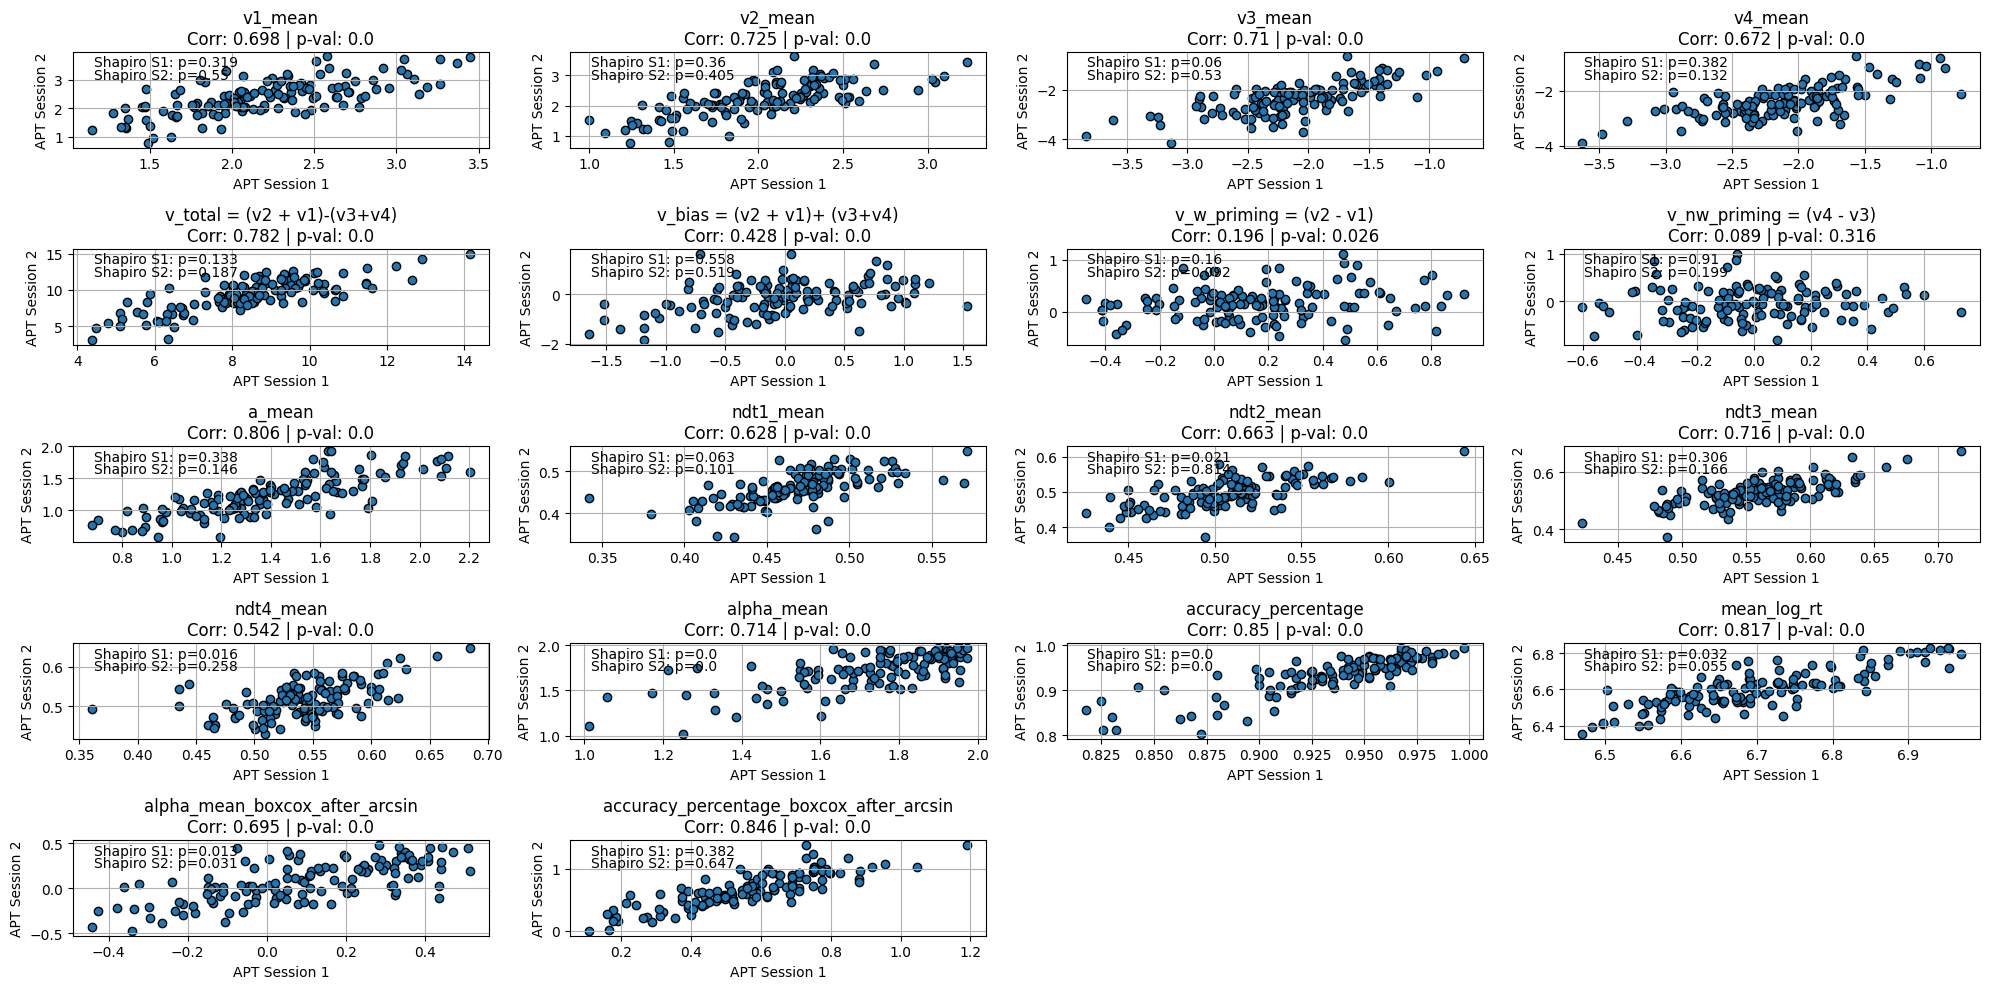

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, pearsonr, shapiro



# Prepare the figure for subplots
num_vars = len(columns_for_analysis)
num_rows = int(np.ceil(np.sqrt(num_vars)))
num_cols = int(np.ceil(num_vars / num_rows))
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))  # Adjust the size as needed
axes = axes.flatten()

# Perform analysis for each variable and plot
for i, col in enumerate(columns_for_analysis):
    # Identify and remove outliers
    outlier_indices = identify_outliers([col], ldt_session_1_data, ldt_session_2_data)[col]
    clean_data = pd.concat([
        ldt_session_1_data.set_index('ID')[col],
        ldt_session_2_data.set_index('ID')[col]
    ], axis=1).drop(outlier_indices)
    
    # Calculate Pearson correlation
    correlation, p_value_corr = pearsonr(clean_data.iloc[:, 0], clean_data.iloc[:, 1])
    
    # Test for normality
    _, p_value_shapiro_1 = shapiro(clean_data.iloc[:, 0])
    _, p_value_shapiro_2 = shapiro(clean_data.iloc[:, 1])
    
    # Round the results to three decimals
    correlation = round(correlation, 3)
    p_value_corr = round(p_value_corr, 3)
    p_value_shapiro_1 = round(p_value_shapiro_1, 3)
    p_value_shapiro_2 = round(p_value_shapiro_2, 3)
    
    # Plotting on the subplot
    ax = axes[i]
    ax.scatter(clean_data.iloc[:, 0], clean_data.iloc[:, 1], edgecolor='k')
    ax.set_title(f'{col}\nCorr: {correlation} | p-val: {p_value_corr}')
    ax.set_xlabel('APT Session 1')
    ax.set_ylabel('APT Session 2')
    ax.grid(True)
    
    # Annotate with Shapiro-Wilk test results
    ax.annotate(f'Shapiro S1: p={p_value_shapiro_1}', xy=(0.05, 0.85), xycoords='axes fraction')
    ax.annotate(f'Shapiro S2: p={p_value_shapiro_2}', xy=(0.05, 0.72), xycoords='axes fraction')

for ax in axes[len(columns_for_analysis):]:
    ax.set_visible(False)

# Adjust layout for readability
plt.tight_layout()

# Save the figure
plt.savefig('EZ_APT_Between_session_combined_correlation_plots.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
